In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
datafile = "Majors_Survey_Results_Fall2023.csv"
df = pd.read_csv(datafile)                            

In [2]:
df.shape

(242, 92)

In [3]:
df.columns = df.columns.str.replace('[', '').str.replace(']', '')
df.columns

Index(['Timestamp', 'Which course are you enrolled in?',
       'How did you hear about County College of Morris? CCM Web site',
       'How did you hear about County College of Morris? Social Media',
       'How did you hear about County College of Morris? Community Event',
       'How did you hear about County College of Morris? Family member or friend',
       'How did you hear about County College of Morris? Current CCM student',
       'How did you hear about County College of Morris? CCM Alumni',
       'How did you hear about County College of Morris? High School Teacher',
       'How did you hear about County College of Morris? High School Counselor',
       'How did you hear about County College of Morris? In-app advertisement',
       'How did you hear about County College of Morris? Employer',
       'How did you hear about County College of Morris? Billboard',
       'How did you hear about County College of Morris? Television',
       'How did you hear about County College

In [4]:
remove = [
           'How did you hear about County College of Morris?',
            'To what extent did the following impact your decision to attend County College of Morris?',
            'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all?', 
            ' of Morris and/or with the Department of Information Technologies, if at all?',
            'Did you receive information about the CCM computing programs from any of the following sources?',
            'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM?',
            'What motivated you to seek a computing degree/certificate at CCM?','[',']'
            
        ]


def remove_prefix(column_name):
    for prefix in remove:
        if prefix in column_name:
            return column_name.replace(prefix, '')
    return column_name


df.columns = [remove_prefix(col) for col in df.columns]

df.columns


Index(['Timestamp', 'Which course are you enrolled in?', ' CCM Web site',
       ' Social Media', ' Community Event', ' Family member or friend',
       ' Current CCM student', ' CCM Alumni', ' High School Teacher',
       ' High School Counselor', ' In-app advertisement', ' Employer',
       ' Billboard', ' Television', ' Radio', ' Home mailer', ' Other',
       ' Affordable cost', ' Location/convenience', ' Choice of programs',
       ' Online offerings', ' Family/friend referral', ' Faculty/staff',
       ' College reputation', ' Financial Aid', ' Scholarships',
       ' Small class sizes', ' Extra-curricular opportunities',
       ' Accepted my transfer credits',
       ' Negative experience at another college', ' NJ Stars Program',
       ' Ability to transfer CCM credits to a 4-year school',
       ' Get college credit while in high school', ' Open House',
       ' Instant Decision Day', ' On-Campus Information Session',
       ' Titans Tuesday (Virtual) Information Session', ' W

In [5]:
df.shape

(242, 92)

In [6]:
#df.drop(df.columns[[0, 86, 87, 88]], axis=1, inplace=True)
#df.columns

In [7]:
df.columns=df.columns.str.lower()
df.columns=df.columns.str.strip()
df.columns=df.columns.str.replace(' ','_')
df.columns

Index(['timestamp', 'which_course_are_you_enrolled_in?', 'ccm_web_site',
       'social_media', 'community_event', 'family_member_or_friend',
       'current_ccm_student', 'ccm_alumni', 'high_school_teacher',
       'high_school_counselor', 'in-app_advertisement', 'employer',
       'billboard', 'television', 'radio', 'home_mailer', 'other',
       'affordable_cost', 'location/convenience', 'choice_of_programs',
       'online_offerings', 'family/friend_referral', 'faculty/staff',
       'college_reputation', 'financial_aid', 'scholarships',
       'small_class_sizes', 'extra-curricular_opportunities',
       'accepted_my_transfer_credits',
       'negative_experience_at_another_college', 'nj_stars_program',
       'ability_to_transfer_ccm_credits_to_a_4-year_school',
       'get_college_credit_while_in_high_school', 'open_house',
       'instant_decision_day', 'on-campus_information_session',
       'titans_tuesday_(virtual)_information_session', 'women_who_dare',
       'regional_col

## How did you hear about County College of Morris?

In [8]:

Q1=df.iloc[:, 2:16]
Q1

,ccm_web_site,social_media,community_event,family_member_or_friend,current_ccm_student,ccm_alumni,high_school_teacher,high_school_counselor,in-app_advertisement,employer,billboard,television,radio,home_mailer
0,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No
1,Yes,Don't recall,No,Yes,No,No,Yes,Don't recall,No,Yes,Don't recall,Don't recall,No,No
2,Yes,Yes,No,Yes,No,No,No,Yes,No,No,No,No,No,No
3,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No
4,Yes,No,Don't recall,Yes,Yes,No,Yes,Yes,Don't recall,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,No,No,No,Yes,Yes,No,Yes,Yes,No,No,No,No,No,No
238,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No
239,Yes,No,Yes,Yes,No,No,Yes,Yes,No,No,No,No,No,No
240,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,No,No,No


In [9]:
answer1 = {}

for col in Q1.columns:
    answer1[col] = Q1[col].value_counts()


answer_1 = [counts.tolist() for counts in answer1.values()]
print(answer_1)
i = [lst[0] for lst in answer_1]


[[139, 86, 17], [172, 52, 18], [176, 47, 19], [168, 64, 10], [129, 102, 11], [153, 72, 17], [115, 112, 15], [126, 107, 9], [213, 19, 10], [215, 14, 13], [207, 20, 15], [215, 18, 9], [221, 15, 6], [186, 40, 16]]


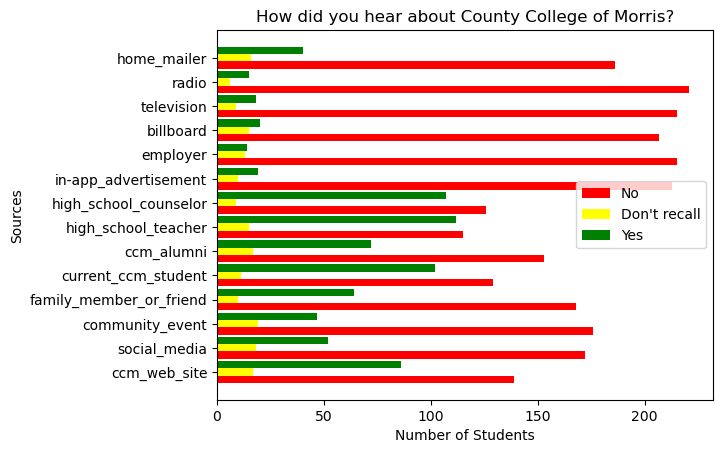

In [10]:
x= Q1.columns 

No = [lst[0] for lst in answer_1] 
Yes = [lst[1] for lst in answer_1] 
Dont_recall = [lst[2] for lst in answer_1]  

y_axis = np.arange(len(x))
plt.barh(y_axis-0.3, No, 0.3, label = 'No',color = 'red') 
plt.barh(y_axis, Dont_recall, 0.3, label = "Don't recall",color = 'yellow') 
plt.barh(y_axis+0.3, Yes, 0.3, label = 'Yes',color = 'green') 
plt.yticks(y_axis, x)


 
plt.ylabel("Sources") 
plt.xlabel("Number of Students") 
plt.title("How did you hear about County College of Morris?") 
plt.legend() 
plt.show() 

## To what extent did the following impact your decision to attend County College of Morris?

In [11]:

Q2=df.iloc[:, 17:32]
Q2

,affordable_cost,location/convenience,choice_of_programs,online_offerings,family/friend_referral,faculty/staff,college_reputation,financial_aid,scholarships,small_class_sizes,extra-curricular_opportunities,accepted_my_transfer_credits,negative_experience_at_another_college,nj_stars_program,ability_to_transfer_ccm_credits_to_a_4-year_school
0,High Impact,High Impact,High Impact,NaN,High Impact,High Impact,High Impact,High Impact,High Impact,Some Impact,No Impact,NaN,NaN,NaN,High Impact
1,No Impact,NaN,High Impact,Some Impact,High Impact,NaN,NaN,No Impact,Some Impact,High Impact,Some Impact,NaN,No Impact,High Impact,Some Impact
2,High Impact,High Impact,High Impact,High Impact,Some Impact,No Impact,Some Impact,Some Impact,Some Impact,High Impact,Some Impact,Some Impact,No Impact,Some Impact,High Impact
3,Some Impact,High Impact,Some Impact,High Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact
4,High Impact,Some Impact,No Impact,No Impact,No Impact,No Impact,Some Impact,High Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,High Impact
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Some Impact,High Impact,No Impact,No Impact,Some Impact,High Impact,High Impact,Some Impact,Some Impact,No Impact,No Impact,No Impact,No Impact,No Impact,High Impact
238,High Impact,High Impact,Some Impact,Some Impact,High Impact,Some Impact,Some Impact,High Impact,High Impact,High Impact,No Impact,Some Impact,Some Impact,No Impact,High Impact
239,Some Impact,High Impact,High Impact,Some Impact,High Impact,NaN,High Impact,High Impact,High Impact,No Impact,No Impact,Some Impact,No Impact,No Impact,High Impact
240,No Impact,No Impact,No Impact,Some Impact,No Impact,No Impact,Some Impact,No Impact,No Impact,No Impact,Some Impact,Some Impact,Some Impact,Some Impact,No Impact


In [12]:
answer2 = {}

for col in Q2.columns:
    answer2[col] = Q2[col].value_counts()

answer_2 = [counts.tolist() for counts in answer2.values()]
print(answer_2)
i = [lst[0] for lst in answer_2]
print('******')
print(i)


[[136, 55, 32], [143, 59, 27], [120, 70, 38], [110, 68, 35], [92, 63, 56], [127, 47, 29], [75, 72, 66], [84, 68, 57], [100, 60, 47], [86, 81, 42], [115, 69, 24], [94, 46, 42], [129, 25, 24], [149, 20, 8], [145, 50, 30]]
******
[136, 143, 120, 110, 92, 127, 75, 84, 100, 86, 115, 94, 129, 149, 145]


In [13]:
high_impact = [lst[0] for lst in answer_2]
print(high_impact)

[136, 143, 120, 110, 92, 127, 75, 84, 100, 86, 115, 94, 129, 149, 145]


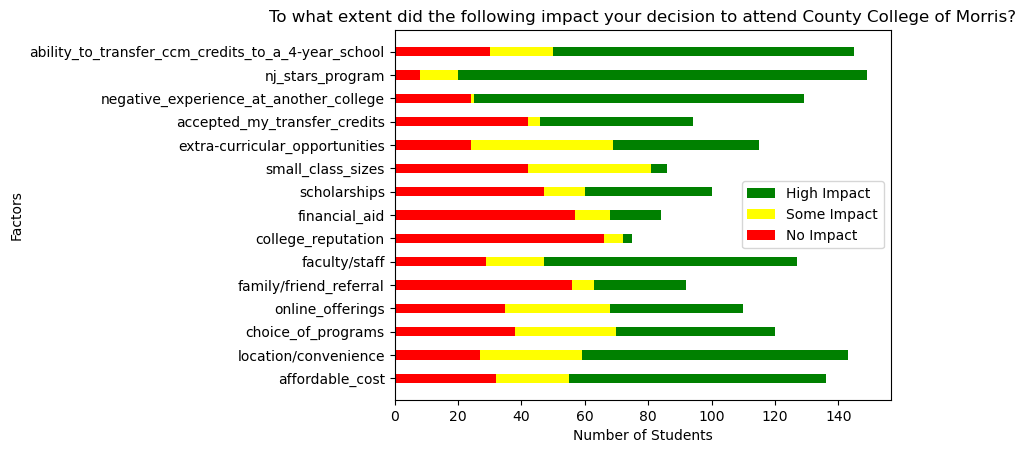

In [14]:
x= Q2.columns 

high_impact = [lst[0] for lst in answer_2] 
some_impact = [lst[1] for lst in answer_2] 
no_impact = [lst[2] for lst in answer_2]  

y_axis = Q2.columns 

plt.barh(y_axis , high_impact, 0.4, label = 'High Impact',color = 'green') 
plt.barh(y_axis , some_impact, 0.4, label = 'Some Impact',color = 'yellow') 
plt.barh(y_axis , no_impact, 0.4, label = 'No Impact',color = 'red') 

 
plt.ylabel("Factors") 
plt.xlabel("Number of Students") 
plt.title("To what extent did the following impact your decision to attend County College of Morris?") 
plt.legend() 
plt.show() 

## Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all?

In [15]:

Q3=df.iloc[:, 33:49]
Q3


,open_house,instant_decision_day,on-campus_information_session,titans_tuesday_(virtual)_information_session,women_who_dare,regional_college_fair,hs_sharetime_information_session,challenger_program,cybersecurity_information_protection_program_participation,information_session_at_my_high_school,campus_visit_with_my_high_school,campus_visit_(individual),workforce_development_class,corporate_training,teen_arts_festival,summer_camp_at_ccm
0,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No
1,Yes,Not Sure,No,Not Sure,No,No,Yes,Not Sure,No,Yes,Yes,Not Sure,No,Yes,No,No
2,No,No,Yes,No,No,No,No,Not Sure,No,No,No,Yes,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
238,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
239,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No
240,Yes,No,Yes,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No


In [16]:
Q3.describe()

,open_house,instant_decision_day,on-campus_information_session,titans_tuesday_(virtual)_information_session,women_who_dare,regional_college_fair,hs_sharetime_information_session,challenger_program,cybersecurity_information_protection_program_participation,information_session_at_my_high_school,campus_visit_with_my_high_school,campus_visit_(individual),workforce_development_class,corporate_training,teen_arts_festival,summer_camp_at_ccm
count,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242
unique,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
freq,170,219,176,198,229,210,202,221,221,189,205,169,227,227,216,227


## To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM?

In [17]:

Q4=df.iloc[:, 50:63]
Q4

,middle/high_school_computing_class,middle/high_school_computing_related_club,"computing-related_competitions_(e.g.,_robotics_competition,_lego_competition,_cybersecurity,_programming)",afterschool_computing-related_camp/program,summer_computing_related_camp/program,an_ap_computing_class,a_dual_enrollment_computing_class,family_or_friend_influence,family_or_friend_working_in_the_computing_field,high_school_teacher_or_guidance_counselor,employer_influence,current_ccm_student,experience_at_work
0,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,High Impact,High Impact,No Impact,No Impact,No Impact,No Impact
1,No Impact,NaN,High Impact,Some Impact,High Impact,No Impact,NaN,High Impact,High Impact,Some Impact,No Impact,NaN,Some Impact
2,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,High Impact,Some Impact,Some Impact,No Impact,Some Impact,No Impact,Some Impact
3,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact
4,Some Impact,No Impact,No Impact,No Impact,No Impact,Some Impact,No Impact,Some Impact,Some Impact,No Impact,No Impact,No Impact,No Impact
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,High Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,Some Impact,High Impact,No Impact,No Impact,Some Impact,Some Impact
238,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,High Impact,High Impact,No Impact,No Impact,No Impact,No Impact
239,High Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact
240,High Impact,No Impact,High Impact,No Impact,No Impact,High Impact,No Impact,High Impact,High Impact,High Impact,No Impact,No Impact,No Impact


##  What motivated you to seek a computing degree/certificate at CCM?

In [18]:

Q5=df.iloc[:, 65:76]
Q5.describe()

,to_get_a_job_in_the_computing_field,transfer_to_bachelor's_level_program,"transfer_credits_back_to_hs_degree_(sharetime,_challenger_program)",career_advancement,career_change,professional_development,job_displacement,relocation,to_keep_current_in_tech_industry,it_industry_certifications,financial
count,180,180,180,180,180,180,180,180,180,180,180
unique,2,2,2,2,2,2,2,2,2,2,2
top,Yes,Yes,No,Yes,No,Yes,No,No,Yes,Yes,Yes
freq,169,122,151,111,119,113,156,153,101,99,109


## Did you receive information about the CCM computing programs from any of the following sources?

In [19]:

Q6=df.iloc[:, 77:85]
Q6

,high_school_guidance_counselor,high_school_teacher,ccm_information_technologies_website,ccm_admissions,ccm_advisor/counselor,employer,ccm_workforce_development,nj_workforce_development_program
0,No,No,No,No,Yes,No,No,No
1,Yes,Don't recall,No,Don't recall,Yes,Yes,No,Don't recall
2,No,No,Yes,Don't recall,No,Yes,No,No
3,No,No,No,No,No,No,No,No
4,Yes,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,No,No,Yes,Yes,Yes,No,No,No
240,Yes,No,Yes,Yes,Yes,No,No,No


In [20]:
answer6 = {}

for col in Q6.columns:
    answer6[col] = Q6[col].value_counts()


answer_6 = [counts.tolist() for counts in answer6.values()]
print(answer_6)
i = [lst[0] for lst in answer_6]


[[111, 51, 18], [126, 28, 26], [94, 69, 17], [104, 55, 21], [108, 50, 22], [159, 15, 6], [158, 16, 6], [155, 17, 8]]


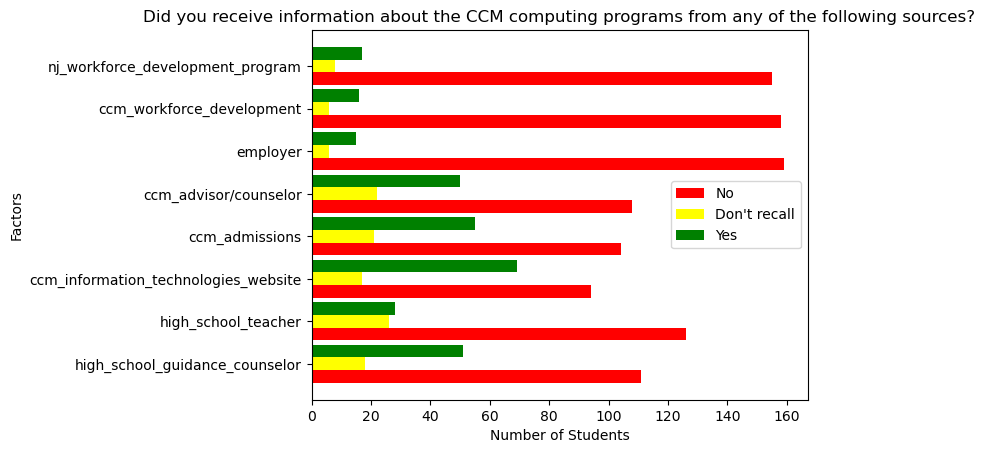

In [21]:
x= Q6.columns 

No = [lst[0] for lst in answer_6] 
Yes = [lst[1] for lst in answer_6] 
Dont_recall = [lst[2] for lst in answer_6]  

y_axis = np.arange(len(x))
plt.barh(y_axis-0.3, No, 0.3, label = 'No',color = 'red') 
plt.barh(y_axis, Dont_recall, 0.3, label = "Don't recall",color = 'yellow') 
plt.barh(y_axis+0.3, Yes, 0.3, label = 'Yes',color = 'green') 
plt.yticks(y_axis, x)

plt.ylabel("Factors") 
plt.xlabel("Number of Students") 
plt.title("Did you receive information about the CCM computing programs from any of the following sources?") 
plt.legend() 
plt.show() 

In [22]:
datafile2 = "Non-Majors Survey Results - Fall 2023.csv"
df2 = pd.read_csv(datafile2)    

In [23]:
Q7=df.iloc[:,91:]  # age column in major table
Q7


,age
0,35-64
1,21-24
2,18 and younger
3,19-20
4,19-20
...,...
237,19-20
238,25-34
239,18 and younger
240,18 and younger


In [24]:
Q8=df2.iloc[:,95:] # Age column in non-majors table
Q8

,Age
0,18 and younger
1,18 and younger
2,19-20
3,18 and younger
4,19-20
...,...
100,19-20
101,21-24
102,25-34
103,21-24


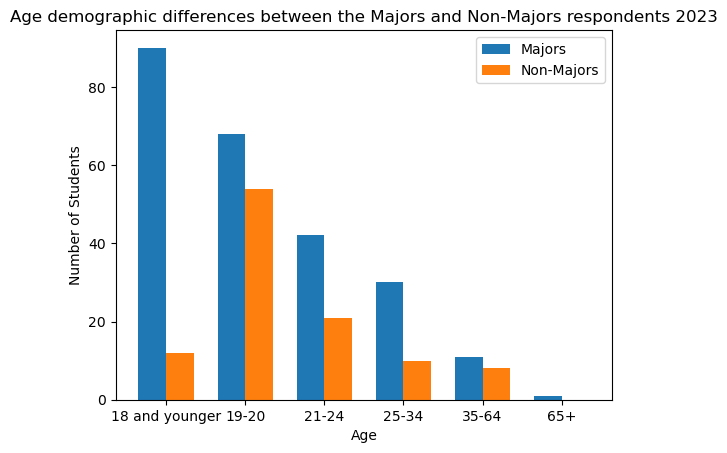

In [25]:
# Age Majors respondents 2023
answer7 = {}
for col7 in Q7.columns:
    answer7[col7] = Q7[col7].value_counts()

age = list(answer7['age'].keys())
a_18 = answer7['age'].get('18 and younger',0)
a_19 = answer7['age'].get('19-20',0)
a_21 = answer7['age'].get('21-24',0)
a_25 = answer7['age'].get('25-34',0)
a_35 = answer7['age'].get('35-64',0)
a_65 = answer7['age'].get('65+',0)

# Age Non-Majors respondents 2023
answer8 = {}
for col8 in Q8.columns:
    answer8[col8] = Q8[col8].value_counts()

age2 = list(answer8['Age '].keys())
a_18_2 = answer8['Age '].get('18 and younger',0)
a_19_2 = answer8['Age '].get('19-20',0)
a_21_2 = answer8['Age '].get('21-24',0)
a_25_2 = answer8['Age '].get('25-34',0)
a_35_2 = answer8['Age '].get('35-64',0)
a_65_2 = answer8['Age '].get('65+',0)


X_axis = np.arange(len(age))

width = 0.35  

fig, ax = plt.subplots()
Majors = ax.bar(X_axis - width/2, [a_18, a_19, a_21, a_25, a_35, a_65], width, label='Majors')
N_Majors = ax.bar(X_axis + width/2, [a_18_2, a_19_2, a_21_2, a_25_2, a_35_2, a_65_2], width, label='Non-Majors')

ax.set_xticks(X_axis)
ax.set_xticklabels(age, rotation=0)
ax.set_xlabel("Age")
ax.set_ylabel("Number of Students")
ax.set_title("Age demographic differences between the Majors and Non-Majors respondents 2023")
ax.legend()

plt.show()


https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

https://www.youtube.com/watch?v=3Xc3CA655Y4

